## **Dataset: Adult - UCI Machine Learning Repository**

Link: https://archive.ics.uci.edu/dataset/2/adult

### **4. Preparar os dados para os modelos de ML:**

In [319]:
import pandas as pd

In [320]:
dataset = pd.read_csv("data/adult.csv")
dataset

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### **4.1 - Tratamento no nome das colunas:**

In [321]:
dataset.columns = ["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
dataset


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### **4.2 - Tratando Valores Incoerentes:**

##### **4.2.1 - workclass:**

In [322]:
dataset["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1115
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

**1836** registros com o atributo "?".

In [323]:
dataset.loc[dataset["workclass"] == " ?", "workclass"] = " Private"

In [324]:
dataset["workclass"].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1115
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

##### **4.2.2 - occupation:**

In [325]:
dataset["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4065
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

**1843** registros com o atributo "?".

In [326]:
dataset.loc[dataset["occupation"] == " ?", "occupation"] = " Prof-specialty"

In [327]:
dataset["occupation"].value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4065
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

##### **4.3.3 - native-country:**

In [328]:
dataset["native-country"].value_counts()

native-country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

**583** registros com o atributo "?".

In [329]:
dataset.loc[dataset["native-country"] == " ?", "native-country"] = " United-States"

In [330]:
dataset["native-country"].value_counts()

native-country
United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [331]:
dataset.to_csv("adult_data_processed.csv", index=False)

#### **4.5 - Pré-processamento dos Dados:**

##### **4.5.1 Separando os Dados:**

In [332]:
x_features = dataset.iloc[:, 0:14].values
y_class = dataset.iloc[:, 14].values

display(x_features, y_class)

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [40, ' Private', 154374, ..., 0, 40, ' United-States'],
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States']],
      shape=(32560, 14), dtype=object)

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      shape=(32560,), dtype=object)

##### **4.5.2 - Codificando a Base de Dados:**

In [333]:
# Ferramentas para Pré-Processamento

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [334]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [335]:
codificador_label = LabelEncoder()

for i in range(x_features.shape[1]):
    x_features[:,i] = codificador_label.fit_transform(x_features[:, i])
    

In [336]:
x_features

array([[22, 6, 2671, ..., 0, 39, 38],
       [33, 5, 2926, ..., 0, 12, 38],
       [21, 3, 14086, ..., 0, 39, 38],
       ...,
       [23, 3, 8080, ..., 0, 39, 38],
       [41, 3, 7883, ..., 0, 39, 38],
       [5, 3, 12881, ..., 0, 19, 38]], shape=(32560, 14), dtype=object)

In [337]:
y_class = codificador_label.fit_transform(y_class)


In [338]:
display(x_features, y_class)

array([[22, 6, 2671, ..., 0, 39, 38],
       [33, 5, 2926, ..., 0, 12, 38],
       [21, 3, 14086, ..., 0, 39, 38],
       ...,
       [23, 3, 8080, ..., 0, 39, 38],
       [41, 3, 7883, ..., 0, 39, 38],
       [5, 3, 12881, ..., 0, 19, 38]], shape=(32560, 14), dtype=object)

array([0, 0, 0, ..., 1, 0, 0], shape=(32560,))

- <=50K - 0 
- \>50K - 1

##### **4.5.3 - Padronização dos Valores Codificados:**

In [339]:
padronizador = StandardScaler()
x_features = padronizador.fit_transform(x_features)
x_features, y_class

(array([[ 0.03080871,  2.62430941, -1.29407819, ..., -0.20417998,
         -0.03112222,  0.26137428],
        [ 0.83753836,  1.72111602, -1.25192133, ..., -0.20417998,
         -2.25444135,  0.26137428],
        [-0.04253035, -0.08527078,  0.59306157, ..., -0.20417998,
         -0.03112222,  0.26137428],
        ...,
        [ 0.10414777, -0.08527078, -0.39985664, ..., -0.20417998,
         -0.03112222,  0.26137428],
        [ 1.42425084, -0.08527078, -0.43242489, ..., -0.20417998,
         -0.03112222,  0.26137428],
        [-1.2159553 , -0.08527078,  0.39384971, ..., -0.20417998,
         -1.67802528,  0.26137428]], shape=(32560, 14)),
 array([0, 0, 0, ..., 1, 0, 0], shape=(32560,)))

In [340]:
x_features.shape, y_class.shape

((32560, 14), (32560,))

##### **4.5.4 - Aplicando Undersampling para problemas de Desbalanceamento:**

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
x_features, y_class = tl.fit_resample(x_features, y_class)
x_features

array([[ 0.03080871,  2.62430941, -1.29407819, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-0.04253035, -0.08527078,  0.59306157, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.05755554, -0.08527078,  0.79971288, ..., -0.20417998,
        -0.03112222,  0.26137428],
       ...,
       [ 0.10414777, -0.08527078, -0.39985664, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.42425084, -0.08527078, -0.43242489, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-1.2159553 , -0.08527078,  0.39384971, ..., -0.20417998,
        -1.67802528,  0.26137428]], shape=(30966, 14))

In [342]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.15)

In [343]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(26321, 14)

(4645, 14)

(26321,)

(4645,)

 ### **Selecionando as Melhores Features:**

- Optei por criar um arquivo a parte para uma melhor organização e para que o treinamento principal seja objetivo. No entanto, além de selecionar as features iremos realizar um treinamento com os modelos para verificar se há perca de desempenho.

- Entretanto, após aplicar todos esses métodos, percebesse que o desempenho dos algoritmos permanece o mesmo ou até perde um pouco em relação se permanecesse todas as features da base de dados. Com isso, para o treinamento definitivo iremos permanecer todas as features.


<a href="2feature_importance.ipynb">Direcionando para o arquivo de seleção de features</a>

### **5- Explorar vários modelos:**

In [344]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn
import pickle as pkl


In [345]:
def PerformanceMetrics(y_true, predict, class_name):
    # Imprime Matriz de Confusão:

    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9, )
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)

    # Imprime a Acurácia:

    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha diagonal (classificador aleatório)
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

Na documentação da base de dados, foi indicado usar os seguintes tipos de modelos:

  - Gradient Boosting Classifier 
  - Support Vector Machines 
  - Random Forest Classifier 
  - Neural Network Classification
  - Logistic Regression 

No entanto, como analisado anteriormente, no atributo "Income" há um desbalanceamento de classes aonde pode ocasionar em uma generalização excessiva para rendas menores ou iguais a U$50K. Com isto, decidi utilizar um algoritmo da biblioteca imblearn chamado:

   - Balanced Random Forest Classifier 

Porque utiliza-lo?
- o Balanced Random Forest ele possui o mesmo funcionamento que o Random Forest tradicional, porém ele realiza uma subamostragem da classe majoritária para que cada árvore obtenha um conjunto de dados equilibrado entre as classes majoritária e minoritária. Ou seja, esse algoritmo combina técnicas de **undersampling** com o algoritmo **Random Forest** para as previsões.

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

##### **6.1 - Regressão Logítica:**

In [347]:
x_train.shape, y_train.shape

((26321, 14), (26321,))

In [348]:
f1_scores = []
model_names = []

In [349]:
modelo_logistica = LogisticRegression()
modelo_logistica.fit(x_train, y_train)
previsao_log = modelo_logistica.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 82.33%.
O modelo identificou corretamente 3236 registros com o rótulo '<=50K'.
O modelo identificou corretamente 588 registros com o rótulo '>50'.


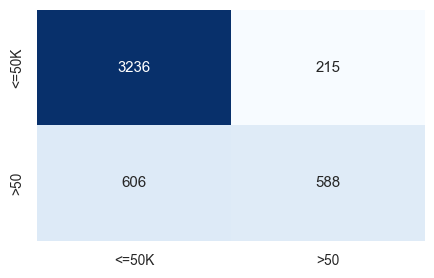

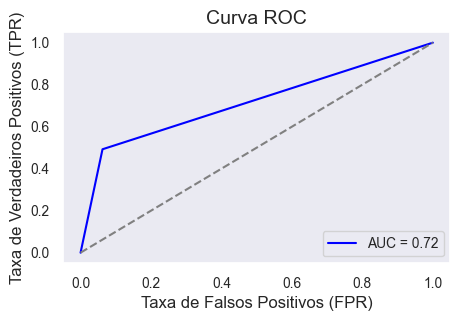

In [350]:
PerformanceMetrics(y_test, previsao_log, ["<=50K", ">50"])

In [351]:
print(classification_report(y_test, previsao_log))
model_names.append("Regressão Logística")
f1_scores.append(f1_score(y_test, previsao_log))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3451
           1       0.73      0.49      0.59      1194

    accuracy                           0.82      4645
   macro avg       0.79      0.72      0.74      4645
weighted avg       0.81      0.82      0.81      4645



##### **6.2 - Support Vector Machines:**

In [352]:
modelo_svm = SVC()
modelo_svm.fit(x_train, y_train)
previsao_svm = modelo_svm.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 85.73%.
O modelo identificou corretamente 3243 registros com o rótulo '<=50K'.
O modelo identificou corretamente 739 registros com o rótulo '>50'.


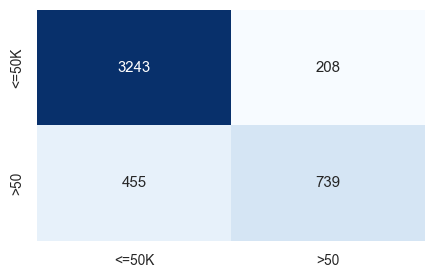

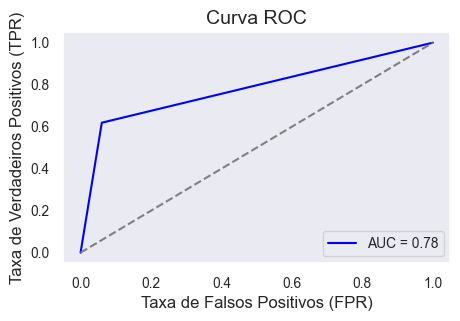

In [353]:
PerformanceMetrics(y_test, previsao_svm, ["<=50K", ">50"])

In [354]:
print(classification_report(y_test, previsao_svm))
model_names.append("SVM")
f1_scores.append(f1_score(y_test, previsao_svm))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3451
           1       0.78      0.62      0.69      1194

    accuracy                           0.86      4645
   macro avg       0.83      0.78      0.80      4645
weighted avg       0.85      0.86      0.85      4645



##### **6.3 - Random Forest Classifier:**

In [355]:
modelo_random = RandomForestClassifier()
modelo_random.fit(x_train, y_train)
previsao_random = modelo_random.predict(x_test)


A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 88.29%.
O modelo identificou corretamente 3246 registros com o rótulo '<=50K'.
O modelo identificou corretamente 855 registros com o rótulo '>50'.


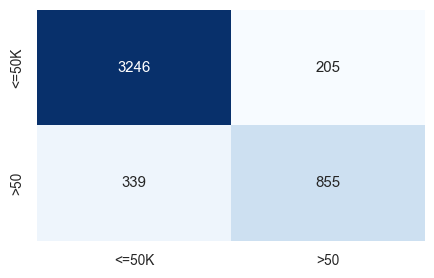

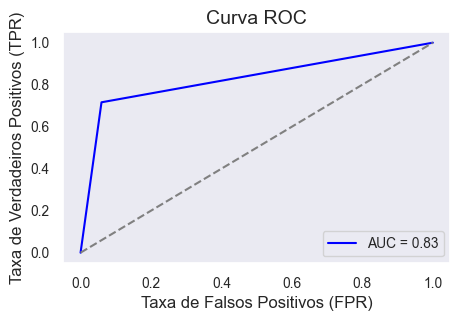

In [356]:
PerformanceMetrics(y_test, previsao_random, ["<=50K", ">50"])

In [357]:
print(classification_report(y_test, previsao_random))
model_names.append("Random Forest")
f1_scores.append(f1_score(y_test, previsao_random))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3451
           1       0.81      0.72      0.76      1194

    accuracy                           0.88      4645
   macro avg       0.86      0.83      0.84      4645
weighted avg       0.88      0.88      0.88      4645



##### **6.4 - Gradient Boosting Classifier:**

In [358]:
modelo_gradient = GradientBoostingClassifier()
modelo_gradient.fit(x_train, y_train)
previsao_gradient = modelo_gradient.predict(x_test)


A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 87.34%.
O modelo identificou corretamente 3265 registros com o rótulo '<=50K'.
O modelo identificou corretamente 792 registros com o rótulo '>50'.


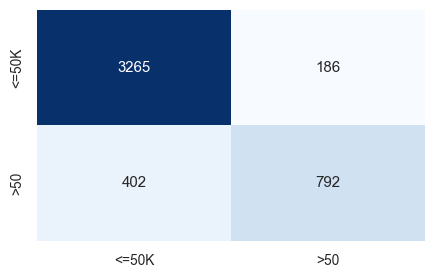

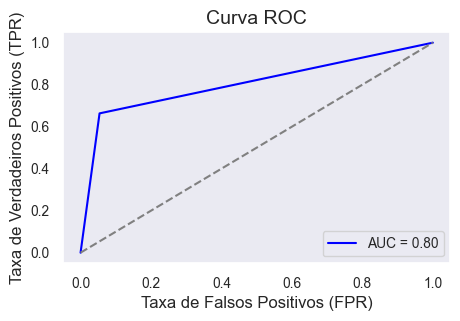

In [359]:
PerformanceMetrics(y_test, previsao_gradient, ["<=50K", ">50"])

In [360]:
print(classification_report(y_test, previsao_gradient))
model_names.append("Gradient Boosting Classifier")
f1_scores.append(f1_score(y_test, previsao_gradient))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3451
           1       0.81      0.66      0.73      1194

    accuracy                           0.87      4645
   macro avg       0.85      0.80      0.82      4645
weighted avg       0.87      0.87      0.87      4645



##### **6.5 - Neural Network Classification:**

In [ ]:
modelo_neural = MLPClassifier()
modelo_neural.fit(x_train, y_train)
previsao_neural = modelo_neural.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.18%.
O modelo identificou corretamente 3136 registros com o rótulo '<=50K'.
O modelo identificou corretamente 867 registros com o rótulo '>50'.


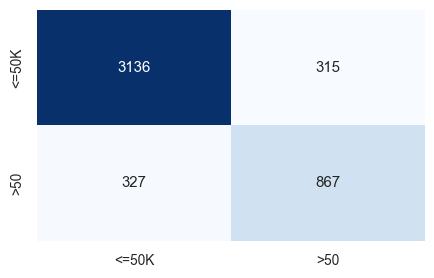

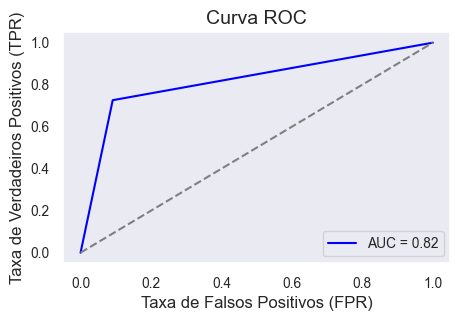

In [362]:
PerformanceMetrics(y_test, previsao_neural, ["<=50K", ">50"])

In [363]:
print(classification_report(y_test, previsao_neural)) 
model_names.append("Neural Network")
f1_scores.append(f1_score(y_test, previsao_neural))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3451
           1       0.73      0.73      0.73      1194

    accuracy                           0.86      4645
   macro avg       0.82      0.82      0.82      4645
weighted avg       0.86      0.86      0.86      4645



##### **6.6 - Balanced Random Forest Classifier:**

In [364]:
modelo_random_bal = BalancedRandomForestClassifier()
modelo_random_bal.fit(x_train, y_train)
previsao_random = modelo_random_bal.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.14%.
O modelo identificou corretamente 3000 registros com o rótulo '<=50K'.
O modelo identificou corretamente 1001 registros com o rótulo '>50'.


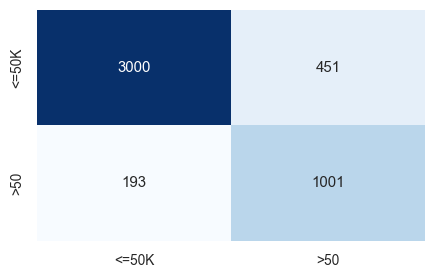

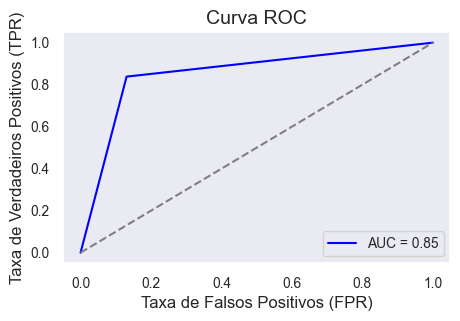

In [365]:
PerformanceMetrics(y_test, previsao_random, ["<=50K", ">50"])

In [366]:
print(classification_report(y_test, previsao_random))
model_names.append("Balanced Random Forest Classifier")
f1_scores.append(f1_score(y_test, previsao_random))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3451
           1       0.69      0.84      0.76      1194

    accuracy                           0.86      4645
   macro avg       0.81      0.85      0.83      4645
weighted avg       0.88      0.86      0.87      4645



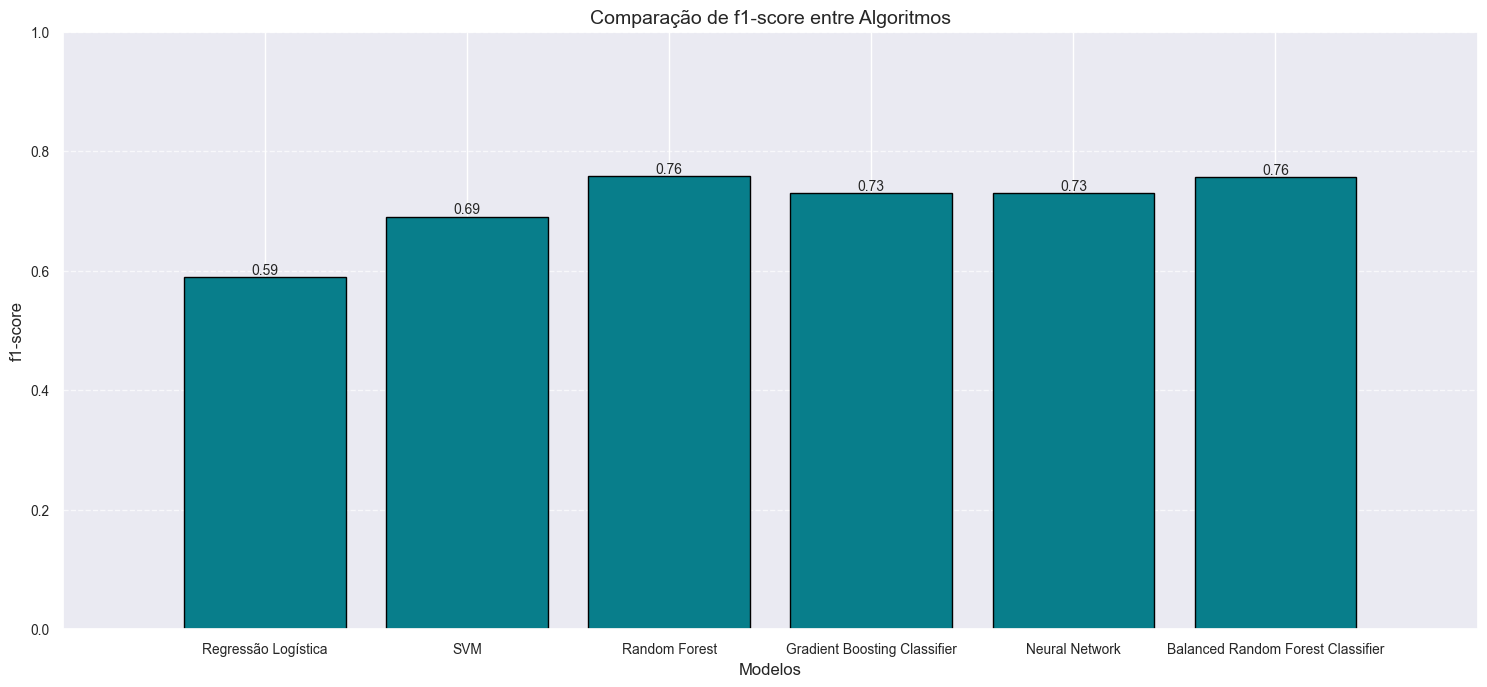

In [368]:
import matplotlib.pyplot as plt
import numpy as np

# Criando o gráfico
plt.figure(figsize=(15, 7))
bars = plt.bar(model_names, f1_scores, color='#087E8B', edgecolor='black')

# Adicionando rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Configurando o gráfico
plt.title("Comparação de f1-score entre Algoritmos", fontsize=14)
plt.ylabel("f1-score", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.ylim(0, 1)
plt.xlim(-1, 6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


Para escolher o melhor modelo para o nosso projeto de Machine Learning é essencial deixar claro o objetivo que é o **desenvolvimento de um modelo capaz de classificar coerentemente registros que ganham mais ou menos ou igual a US$50.000 por ano**. Se o objetivo é classificar coerentemente os registros com as duas classes, o algoritmo deve demonstrar uma capacidade de classificação igualitária entre os rótulos. Como a base possui um desbalanceamento de atributos classe, é normal que os algoritmos consigam identificar melhor registros que ganham menos ou igual a US$50.000. Contudo, os algoritmos que demonstraram um desempenho equivalente foi o Balanced Random Forest e o Tradicional Random Forest. Para definir qual dos algoritmos utilizar, vamos otimiza-los para tentar extrair o máximo de desempenho

### **6 - Otimização do Modelo**

#### **6.1- Encontrando os melhores parâmetros com GridSearch:**

##### **6.1.2- Balanced Random Forest:**

In [369]:
param_grid = {'n_estimators': [10, 40, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]
              }

grid_search =  GridSearchCV(estimator=BalancedRandomForestClassifier(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

np.float64(0.8580056143673831)

In [371]:
modelo_random_bal = BalancedRandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=40)
modelo_random_bal.fit(x_train, y_train)
previsao_random = modelo_random_bal.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 85.62%.
O modelo identificou corretamente 2986 registros com o rótulo '<=50K'.
O modelo identificou corretamente 991 registros com o rótulo '>50'.


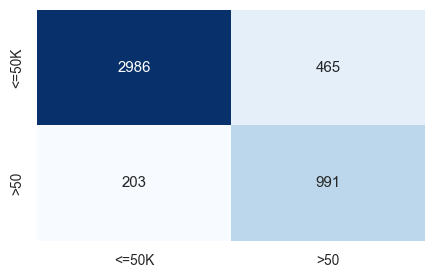

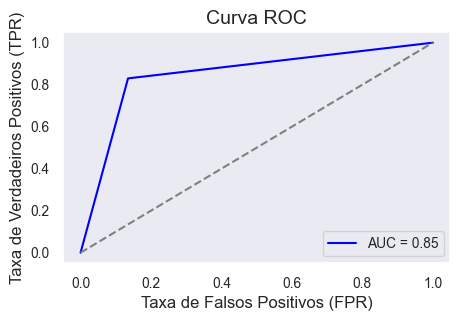

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3451
           1       0.68      0.83      0.75      1194

    accuracy                           0.86      4645
   macro avg       0.81      0.85      0.82      4645
weighted avg       0.87      0.86      0.86      4645



In [372]:
PerformanceMetrics(y_test, previsao_random, ["<=50K", ">50"])
print(classification_report(y_test, previsao_random))

##### **6.1.2 -  Random Forest:**

In [370]:
param_grid = {'n_estimators': [10, 40, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]
              }

grid_search =  GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

np.float64(0.8803850327124154)

In [375]:
modelo_random = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
modelo_random.fit(x_train, y_train)
previsao_random = modelo_random.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 88.27%.
O modelo identificou corretamente 3245 registros com o rótulo '<=50K'.
O modelo identificou corretamente 855 registros com o rótulo '>50'.


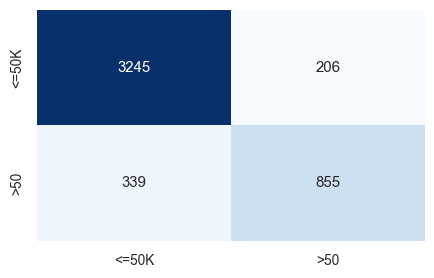

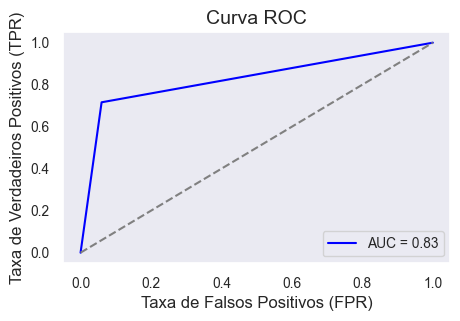

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3451
           1       0.81      0.72      0.76      1194

    accuracy                           0.88      4645
   macro avg       0.86      0.83      0.84      4645
weighted avg       0.88      0.88      0.88      4645



In [376]:
PerformanceMetrics(y_test, previsao_random, ["<=50K", ">50"])
print(classification_report(y_test, previsao_random))

In [377]:
with open("model_random_forest.pkl","wb") as f:
   pkl.dump(modelo_random, f)

### Resultado do Treinamento:

- Entre os 6 modelos utilizados para a classificação de registros, aqueles que mostraram os melhores resultados foram:

1. **Balanced Random Forest** com **85.62% de acurácia** 
2. **Random Forest** com **88.27% de acurácia**. 

- No entanto, após a otimização de parâmetros com o GridSearch, notamos que o Random Forest foi o algoritmo mais capacitado em classificar registros referentes a sua renda, equilibrindo nas métricas recall e precision. Com isso, definimos que para o problema enfretando no projeto, iremos assumir o algoritmo Random Forest para a classificação de Registros

### **7- Apresentando Solução:**

<a href="3test.ipynb">Direcionando para o Arquivo de apresentação da solução</a>